Accuracy: 0.9133

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91       160
           1       0.87      0.96      0.91       140

    accuracy                           0.91       300
   macro avg       0.92      0.92      0.91       300
weighted avg       0.92      0.91      0.91       300



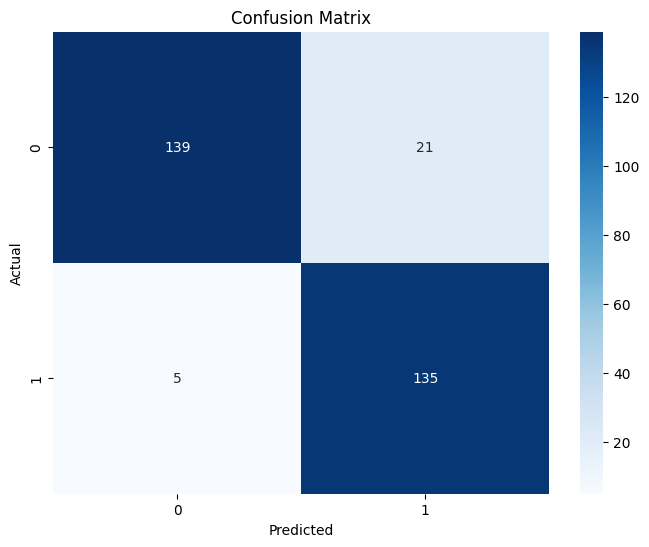

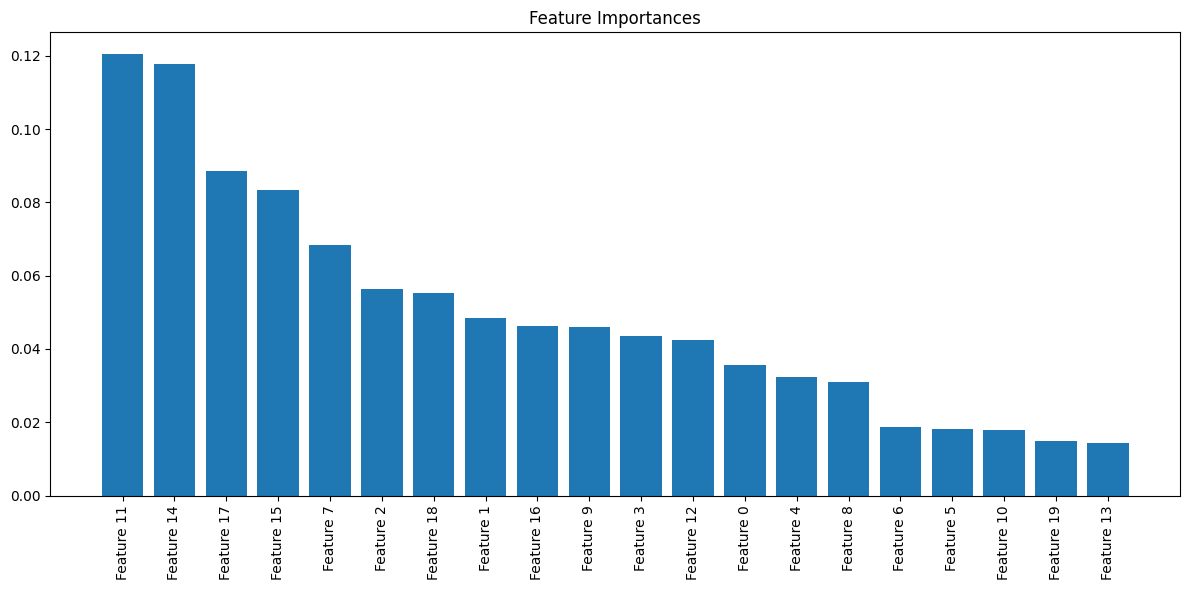

Average number of nodes: 129.3
Average maximum depth: 10.0


/home/bibek/Desktop/machine_leaning/numpylearning/.venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bibek/Desktop/machine_leaning/numpylearning/.venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/bibek/Desktop/machine_leaning/numpylearning/.venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, 
                           n_redundant=5, n_clusters_per_class=2, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [f"Feature {i}" for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Estimator depth analysis
n_nodes = []
max_depths = []

for tree in model.estimators_:
    n_nodes.append(tree.tree_.node_count)
    max_depths.append(tree.tree_.max_depth)

print(f"Average number of nodes: {np.mean(n_nodes):.1f}")
print(f"Average maximum depth: {np.mean(max_depths):.1f}")

# Plot OOB error vs number of trees
estimators = range(1, 100, 5)
errors = []

for n in estimators:
    forest = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    forest.fit(X_train, y_train)
    errors.append(1 - forest.oob_score_)

plt.figure(figsize=(10, 6))
plt.plot(estimators, errors)
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate vs Number of Trees')
plt.grid(True)
plt.show()